Using TensorFlow backend.


Output of the Model


c:\users\om shreenidhi\appdata\local\programs\python\python37\lib\site-packages\skimage\color\colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
c:\users\om shreenidhi\appdata\local\programs\python\python37\lib\site-packages\skimage\color\colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 4 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))
c:\users\om shreenidhi\appdata\local\programs\python\python37\lib\site-packages\skimage\color\colorconv.py:1128: UserWarning: Color data out of range: Z < 0 in 15 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


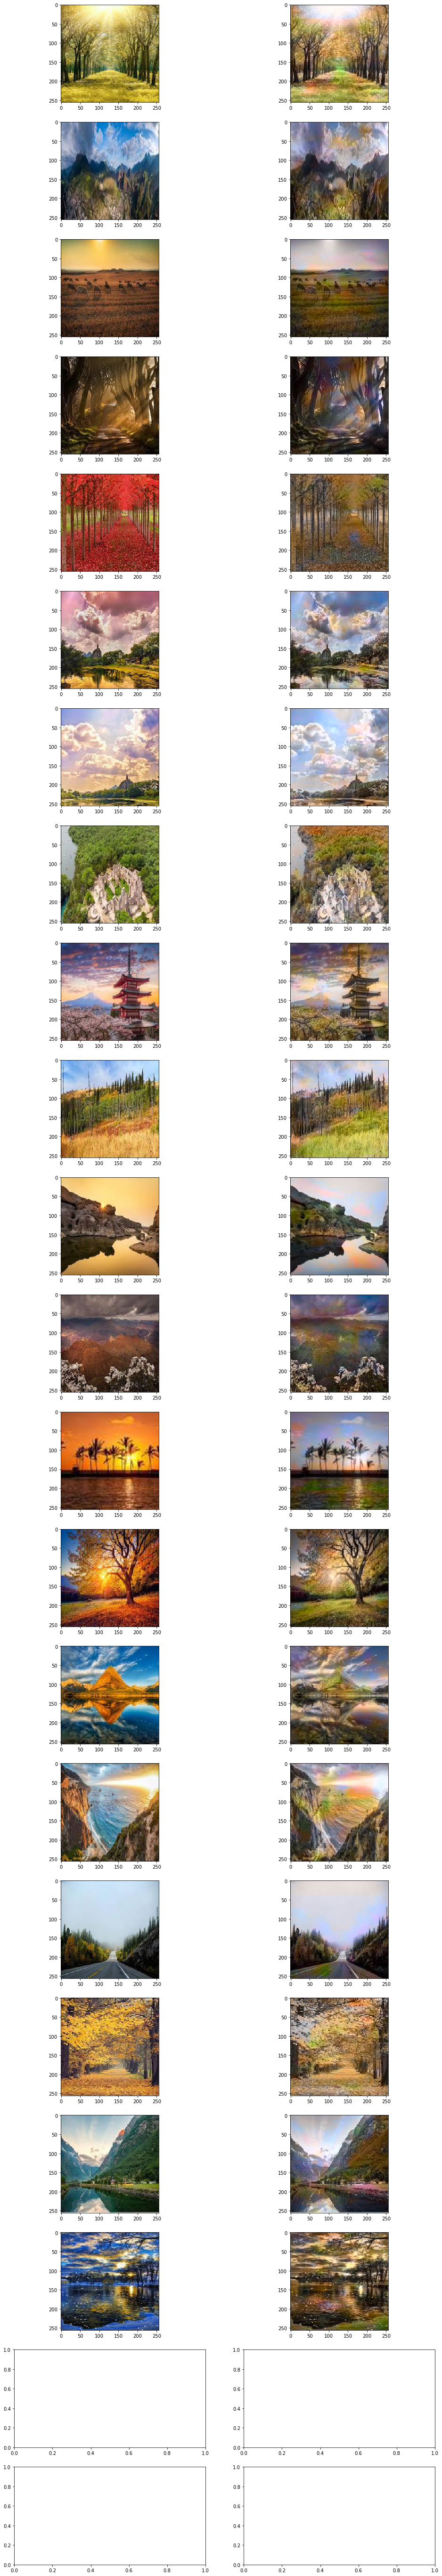

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import cv2
import os
%matplotlib inline 
from matplotlib import pyplot as plt



json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")


 
fig, ax = plt.subplots(22, 2, figsize=(16,100))
row = 0
colorize = []
print('Output of the Model')
for filename in os.listdir(r"Resized/")[200:220]:
    colorize.append(img_to_array(load_img(r"Resized/"+filename)))
    ax[row,0].imshow(load_img(r"Resized/"+filename), interpolation='nearest')
    row +=1

colorize = np.array(colorize, dtype=float)
colorize = rgb2lab(1.0/255*colorize)[:,:,:,0]
colorize = colorize.reshape(colorize.shape+(1,))
 
# Test model
output = loaded_model.predict(colorize)
output = output * 128
 
row = 0
 
# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = colorize[i][:,:,0]
    cur[:,:,1:] = output[i]
    resImage = lab2rgb(cur)
    ax[row,1].imshow(resImage, interpolation='nearest')
    row +=1